In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uproot
import mplhep as hep
hep.style.use('CMS')
import os
from mpl_toolkits.mplot3d import Axes3D

In [1]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [4]:
v1 = np.array([1,0,1])
v2 = np.array([0,1,0])

print(angle_between(v1, v2) / np.pi)

0.5


In [7]:
process = 'h2h2lPlM_lem'
num_BPs = 21
base_dir = '/vols/cms/emc21/idmStudy/MadGraph_files/distributions'

BP = f'BP1'
plot_dir = f'{base_dir}/{process}/{BP}/plots'


data_dir = f'{base_dir}/{process}/{BP}/{process}_{BP}/Events/run_01/unweighted_events.root'

file = uproot.open(data_dir)
tree = file['LHEF']
tree = tree['Particle']

data = tree.arrays(['Particle.PID', 'Particle.Px','Particle.Py', 'Particle.Pz', 'Particle.PT', 'Particle.E', 'Particle.Eta'], library='pd')


In [17]:
H_data = data[(data['Particle.PID'] == 35)]
g = H_data.groupby('entry')

def getVectors(df):
    vs = df[['Particle.Px', 'Particle.Py', 'Particle.Pz']].to_numpy()
    return vs

vs = g.apply(getVectors)


In [27]:
print(vs[0][:,0])

[-155.8395814    81.21606393]


[[-155.8395814   -49.62774047  -18.2338369 ]
 [  81.21606393   37.5787332    21.24948984]]
[-0.94698376 -0.30157078 -0.11080078]


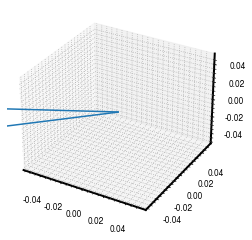

In [33]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

i = 0
print(vs[0])
v1 = vs[i][0]
v2 = vs[i][1]
v1 = unit_vector(v1)
v2 = unit_vector(v2)

X = vs[i][:,0]
Y = vs[i][:,1]
Z = vs[i][:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0 ,0, X, Y, Z)
#ax.set_xlim([-1, 0.5])
#ax.set_ylim([-1, 1.5])
#ax.set_zlim([-1, 8])
plt.show()
